In [308]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=6)

In [309]:
data = pd.read_excel('cars_dataset.xlsx', )
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,1,4,23.40,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,1,3,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,1,2,17.70,1497,78,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,1,4,23.00,1396,90,5
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,1,4,16.10,1298,88.2,5


In [310]:
data_set = data.drop(['name', 'max_power'], axis = 1)
data_set.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,0.571973,0.196604,0.870817,3.537771,19.418816,1458.635212,5.405389
std,4.044249,8.062534e+05,5.655055e+04,0.544319,0.464810,0.335423,0.721824,3.981875,497.017508,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,0.000000,0.000000,1.000000,3.000000,16.800000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,0.000000,1.000000,4.000000,19.420000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,1.000000,0.000000,1.000000,4.000000,22.277500,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,14.000000


In [311]:
data_norm = (data_set - data_set.min())/(data_set.max() - data_set.min())
data_norm

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,0.837838,0.042126,0.061640,0.333333,0.0,1.0,1.00,0.557143,0.209396,0.25
1,0.837838,0.034102,0.050837,0.333333,0.0,1.0,0.75,0.503333,0.293289,0.25
2,0.621622,0.012839,0.059310,0.000000,0.0,1.0,0.50,0.421429,0.292953,0.25
3,0.729730,0.019559,0.053803,0.333333,0.0,1.0,1.00,0.547619,0.259060,0.25
4,0.648649,0.010030,0.050837,0.000000,0.0,1.0,1.00,0.383333,0.226174,0.25
...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,0.029087,0.046601,0.000000,0.0,1.0,1.00,0.440476,0.192282,0.25
8124,0.648649,0.010532,0.050414,0.333333,0.0,1.0,0.25,0.400000,0.291611,0.25
8125,0.702703,0.035306,0.050837,0.333333,0.0,1.0,1.00,0.459524,0.209396,0.25
8126,0.810811,0.026078,0.010591,0.333333,0.0,1.0,1.00,0.561190,0.259060,0.25


In [395]:
data_norm.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
count,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,0.832541,0.061010,0.029578,0.190658,0.098302,0.870817,0.884443,0.462353,0.280079,0.283782
std,0.109304,0.080868,0.023957,0.181440,0.232405,0.335423,0.180456,0.094807,0.166784,0.079073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.756757,0.022568,0.014827,0.000000,0.000000,1.000000,0.750000,0.400000,0.192282,0.250000
50%,0.864865,0.042126,0.025418,0.333333,0.000000,1.000000,1.000000,0.462381,0.209396,0.250000
75%,0.918919,0.064694,0.041517,0.333333,0.000000,1.000000,1.000000,0.530417,0.321477,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [312]:
x_train = np.array(data_norm.drop(['selling_price'], axis = 1))
y_train = np.array(data_norm.iloc[:, 1:2].values)
x_train

array([[0.837838, 0.06164 , 0.333333, ..., 0.557143, 0.209396, 0.25    ],
       [0.837838, 0.050837, 0.333333, ..., 0.503333, 0.293289, 0.25    ],
       [0.621622, 0.05931 , 0.      , ..., 0.421429, 0.292953, 0.25    ],
       ...,
       [0.702703, 0.050837, 0.333333, ..., 0.459524, 0.209396, 0.25    ],
       [0.810811, 0.010591, 0.333333, ..., 0.56119 , 0.25906 , 0.25    ],
       [0.810811, 0.010591, 0.333333, ..., 0.56119 , 0.25906 , 0.25    ]])

In [313]:
y_train

array([[0.042126],
       [0.034102],
       [0.012839],
       ...,
       [0.035306],
       [0.026078],
       [0.026078]])

In [401]:
b_init = 700.00
w_init = np.array([ 0.252525, 0.524164, 0.301242, 0.500000, 0.5, 0.424242, 0.333333, 0.5, 0.717171])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (9,), b_init type: <class 'float'>


In [402]:
# Predicción única elemento por elemento
def predict_single_loop(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [403]:
def predict(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    p = np.dot(x, w) + b     
    return p 

In [404]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo
      b (scalar)       : parámetro b del modelo
      
    Returns:
      cost (scalar): costo
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [405]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Costo óptimo w : {cost}') #Con un minimo de $100.00

Costo óptimo w : [246107.011515]


# 5. Gradiente Descendiente con múltiples variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, parámetros $w_j$,  $b$, son actualizados simultáneamente simultaneously  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos.

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo,  $y^{(i)}$ es la variable objetivo

## 5.1 Compute Gradient with Multiple Variables
Se implementará la ecuación (6) y (7).
- bucle externo sobre todos los m ejemplos. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo se puede calcular directamente y acumular
    - en un segundo bucle sobre todas las n características:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ es calculado para cada $w_j$.

In [319]:
def compute_gradient(X, y, w, b): 
    """
    Calcula la gradiente para la regresión lineal
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo 
      b (scalar)       : parámetro b del modelo
      
    Returns:
      dj_dw (ndarray (n,)): La gradiende del costo del parámetro w. 
      dj_db (scalar):       La gradiende del costo del parámetro b. 
    """
    m,n = X.shape           #(número de ejemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return dj_db, dj_dw

In [320]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [701.57962]
dj_dw at initial w,b: 
 [584.096699  20.752713 133.77948   68.978714 610.996864 620.519792
 324.379173 196.506837 199.104688]


In [327]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
   Realiza descenso de gradiente por lotes para aprender w y b. Actualiza w y b tomando num_iters pasos de gradiente con tasa de aprendizaje alfa
    
    Args:
      X (ndarray (m,n))   : Data, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : valor inicial del parámetro w
      b_in (scalar)       : valor inicial del parámetro b
      cost_function       : función costo
      gradient_function   : función que calcula la gradiente
      alpha (float)       : tasa de aprendizaje alfa
      num_iters (int)     : número de iteraciones para retornar la gradiente por descenso
      
    Returns:
      w (ndarray (n,)) : valor final del parámetro w
      b (scalar)       : valor final del parámetro b
      """
    
    # Un array que almacena el costo J y los pesos w's de cada iteración para graficar
    J_history = []
    w = copy.deepcopy(w_in)  #evita modificar w global dentro de la función
    b = b_in
    
    for i in range(num_iters):

        # Calculla la gradiente 
        dj_db,dj_dw = gradient_function(X, y, w, b)  

        # actualiza los parámetros utilizando w, b, alpha y la gradiente
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # guarda el costo J en cada iteración
        if i<100000:      # previene el agotamiento de recursos
            J_history.append( cost_function(X, y, w, b))

        # Imprime el costo  cada intervalo de 10 0
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #retorna los valores finales de  w,b y historial de J para plotear

In [384]:
# inicializando parámetros
initial_w = np.zeros_like(w_init)
initial_b = 0.
# configuración de parámetros para el algoritmo de la gradiente por descenso
iterations = 1000
alpha = 0.4
# ejecutar el algoritmo de la gradiente descendiente
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    if i% math.ceil(m / 10) == 0:
        print(f"prediction: {np.dot(x_train[i], w_final) + b_final}, target value: {y_train[i]}")

Iteration 0: Cost [0.003624]   
Iteration 100: Cost [0.001623]   
Iteration 200: Cost [0.001571]   
Iteration 300: Cost [0.001536]   
Iteration 400: Cost [0.001511]   
Iteration 500: Cost [0.001493]   
Iteration 600: Cost [0.00148]   
Iteration 700: Cost [0.001469]   
Iteration 800: Cost [0.001462]   
Iteration 900: Cost [0.001456]   
b,w found by gradient descent: [-0.04854],[ 0.192512 -0.068464  0.025013  0.02308  -0.092093  0.006566  0.011156
  0.192253 -0.141983] 
prediction: [0.04232], target value: [0.042126]
prediction: [0.037825], target value: [0.060181]
prediction: [0.047796], target value: [0.052157]
prediction: [0.037169], target value: [0.03009]
prediction: [0.062869], target value: [0.050652]
prediction: [0.07627], target value: [0.052157]
prediction: [0.069148], target value: [0.065196]
prediction: [0.061511], target value: [0.097292]
prediction: [0.034224], target value: [0.025075]
prediction: [0.025534], target value: [0.024574]


In [386]:
datos_prueba = [[0.8, 0.2 , 0.3, 0, 1, 0.75, 0.5, 0.3, 0.25]]
prueba = predict(datos_prueba, w_final, b_final)
prueba

array([0.039869])

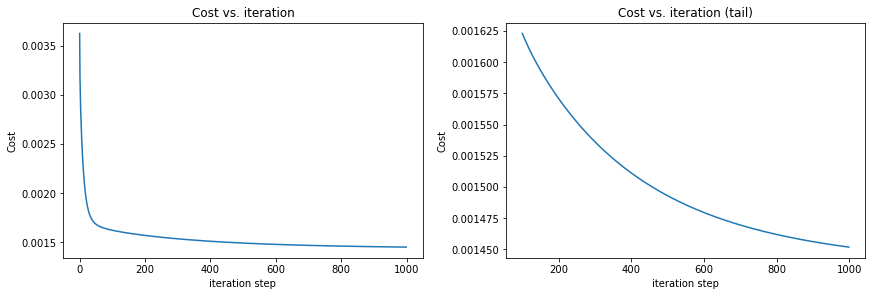

In [387]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [346]:
def Real_p(x, w, b):
    precio_real = predict(x, w_final, b_final) * max(data['selling_price'])
    return precio_real

In [347]:
print(Real_p(datos_prueba, w_final, b_final))

[410584.442477]


In [357]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(x_train, y_train)
reg1.score(x_train, y_train)

0.5642962890137841

In [362]:
r = reg1.predict(datos_prueba)
print (r * Real_p(datos_prueba, w_final, b_final))

[[-156.586496]]


<Figure size 360x288 with 0 Axes>

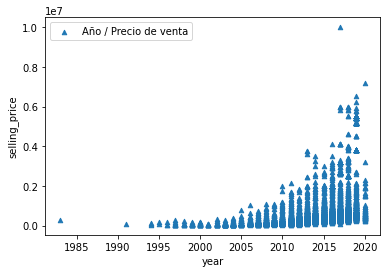

In [382]:
plt.figure(figsize = (5,4))
data.plot("year", "selling_price", kind="scatter",marker = '^', label = 'Año / Precio de venta')
plt.show()

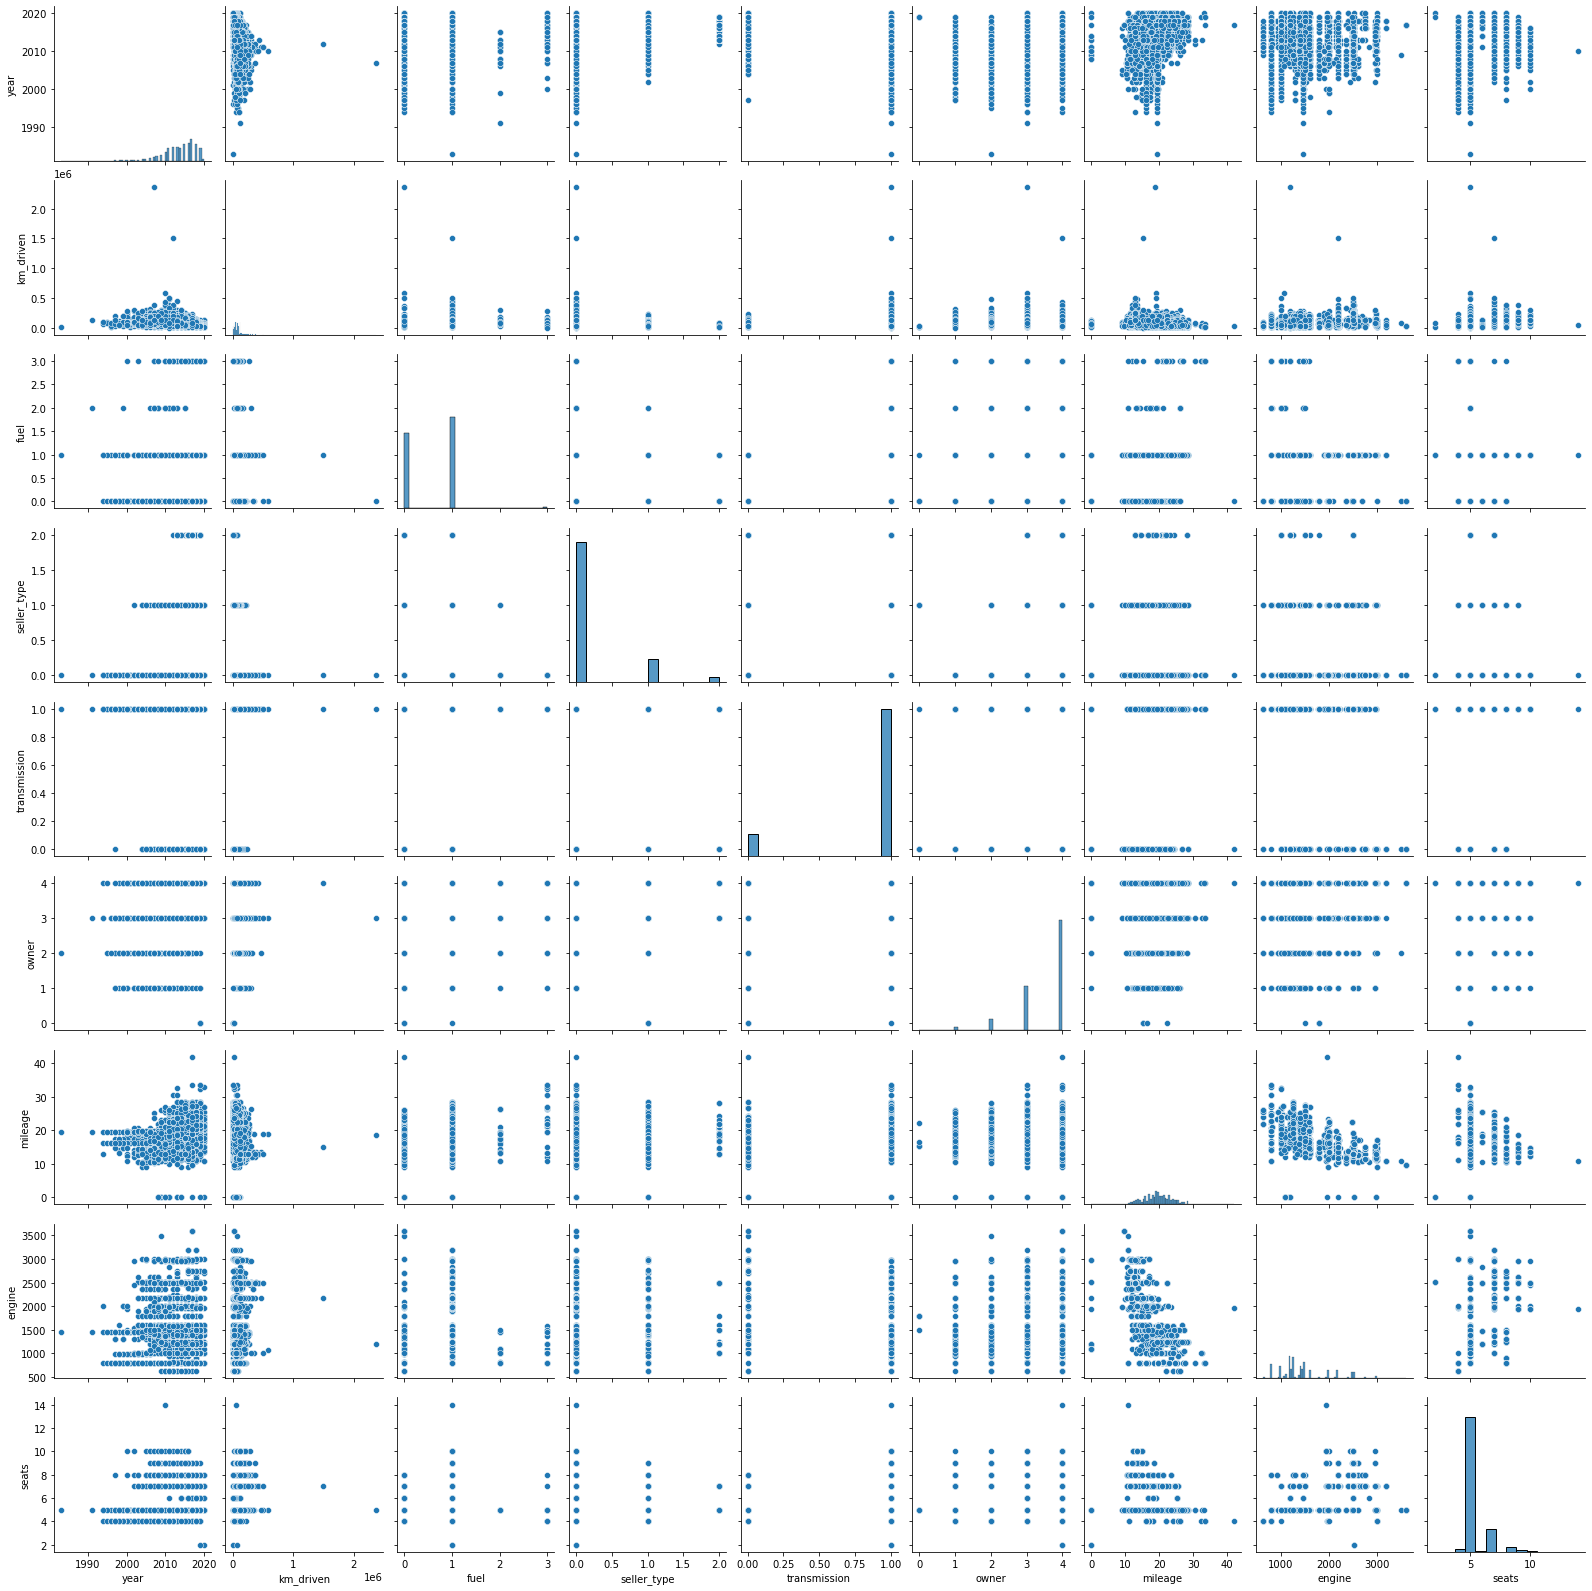

In [390]:
import seaborn as sns
grafico_pairplot = data.drop(['selling_price'], axis = 1)
sns.pairplot (grafico_pairplot)